In [ ]:
!pip install fal-client

In [ ]:
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# https://fal.ai/dashboard/keys
# put your key in the .env file with the name FAL_KEY

{'image': {'url': 'https://fal.media/files/elephant/DQuyI38p2PDSq0PCJrg01_5c98ed577d114c9697835c0e6ada242a.png', 'content_type': 'image/png', 'file_name': '5c98ed577d114c9697835c0e6ada242a.png', 'file_size': 6694, 'width': 1024, 'height': 768}}

Original Image:


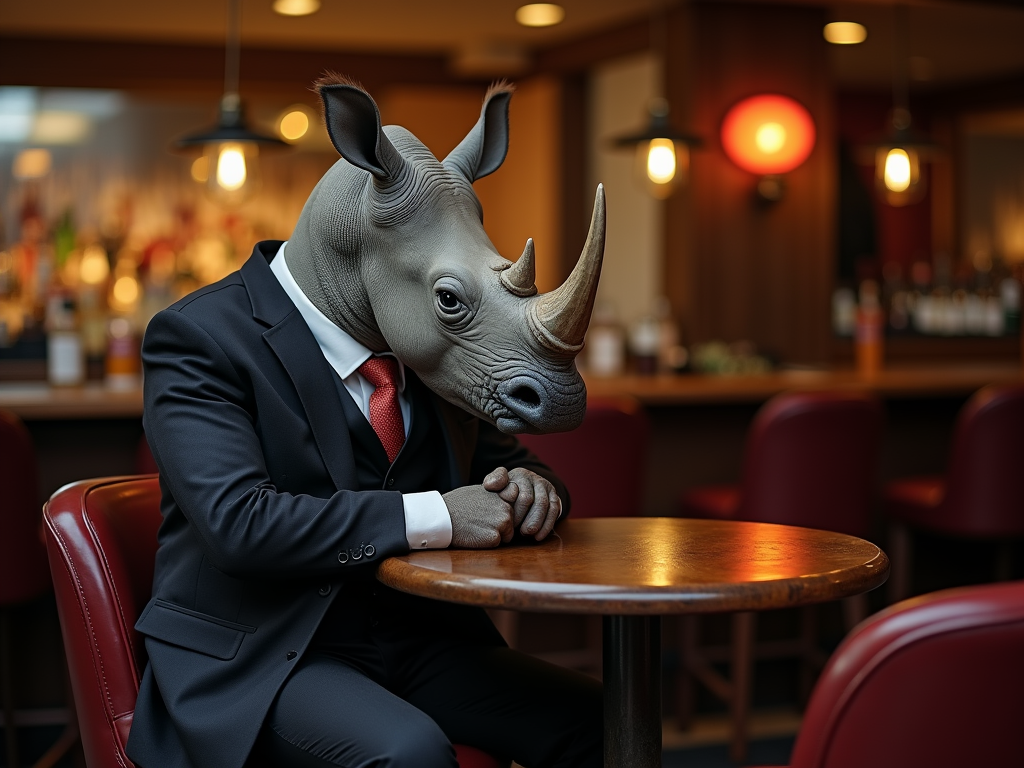


Added Mask


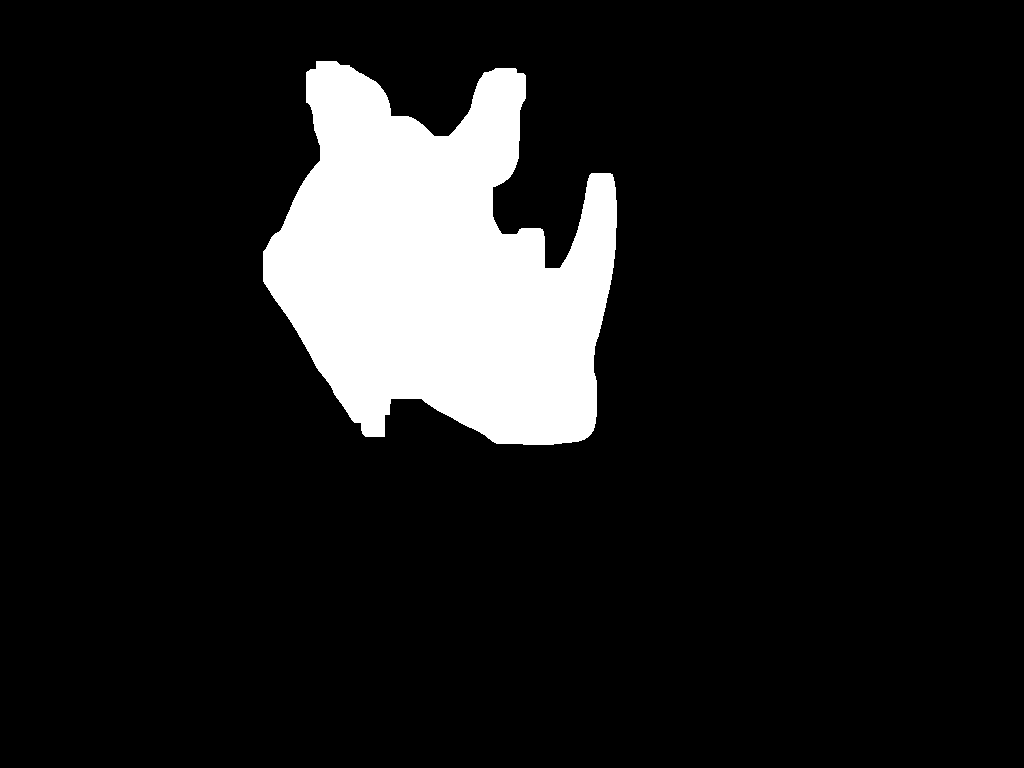

In [10]:
import fal_client
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display

def on_queue_update(update):
    if isinstance(update, fal_client.InProgress):
        for log in update.logs:
           print(log["message"])

image_url = fal_client.upload_file("rhino-suit.png")

# https://fal.ai/models/fal-ai/evf-sam

result = fal_client.subscribe(
    "fal-ai/evf-sam",
    arguments={
        "prompt": "Just the rhino's head",
        "image_url": image_url,
        "use_grounding_dino": True,
        "fill_holes": True,
        "expand_mask": 20

    },
    with_logs=True,
    on_queue_update=on_queue_update,
)
print(result)

mask_url = result['image']['url']

# Load original image
print("\nOriginal Image:")
original_img = Image.open("rhino-suit.png")
display(original_img)
print("\nAdded Mask")
response = requests.get(mask_url)
mask_img = Image.open(BytesIO(response.content))
display(mask_img)


Generating 1 images...
  4%|▍         | 1/24 [00:00<00:05,  4.42it/s]
Generating 1 images...
  4%|▍         | 1/24 [00:00<00:05,  4.42it/s]
Generating 1 images...
  4%|▍         | 1/24 [00:00<00:05,  4.42it/s]
Generating 1 images...
 33%|███▎      | 8/24 [00:01<00:03,  5.33it/s]
Generating 1 images...
 33%|███▎      | 8/24 [00:01<00:03,  5.33it/s]
Generating 1 images...
 62%|██████▎   | 15/24 [00:02<00:01,  5.36it/s]
Generating 1 images...
 83%|████████▎ | 20/24 [00:03<00:00,  5.36it/s]
Generating 1 images...
 83%|████████▎ | 20/24 [00:03<00:00,  5.36it/s]
Generating 1 images...
 83%|████████▎ | 20/24 [00:03<00:00,  5.36it/s]
Generating 1 images...
100%|██████████| 24/24 [00:04<00:00,  5.38it/s]
NSFW probability: 0.00015347426233347505
Uploading images...
Generating 1 images...
100%|██████████| 24/24 [00:04<00:00,  5.38it/s]
NSFW probability: 0.00015347426233347505
Uploading images...
Generating 1 images...
100%|██████████| 24/24 [00:04<00:00,  5.38it/s]
NSFW probability: 0.00015347426

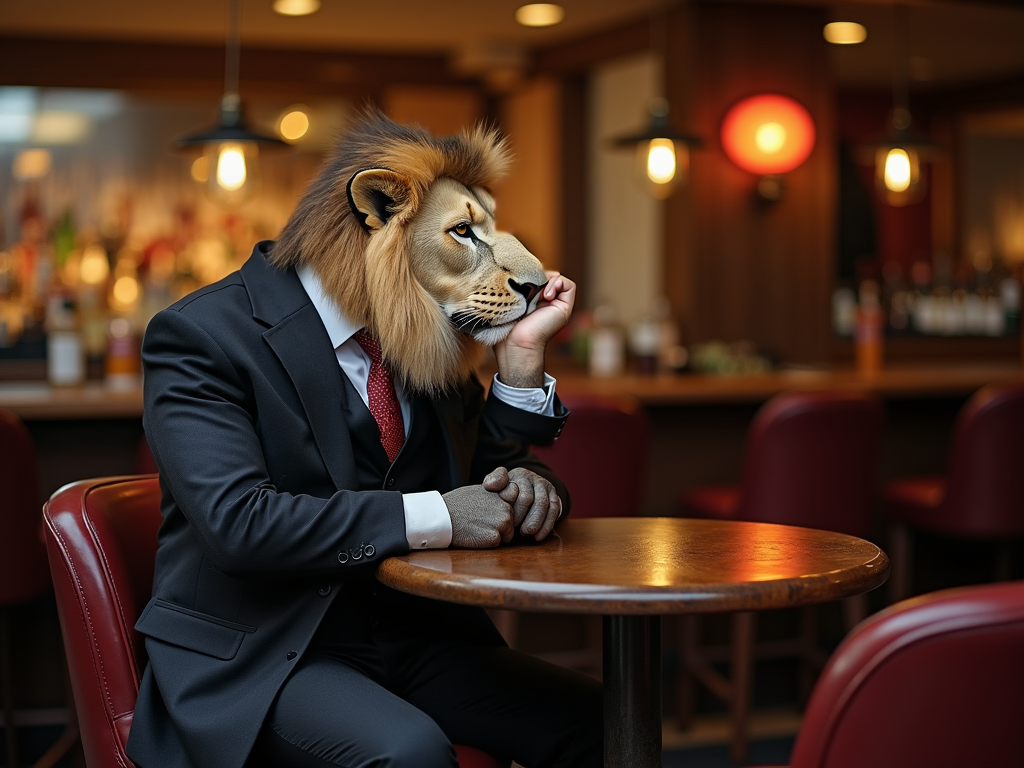

In [11]:
import fal_client

prompt = "a photo of a lion in a suit"

result = fal_client.subscribe(
    "fal-ai/flux-general/inpainting",
    arguments={
        "image_url": image_url,
        "mask_url": mask_url,
        "prompt": prompt
    },
    with_logs=True,
    on_queue_update=on_queue_update,
)
print(result)

print("\nAfter transformation:")

# Get and display transformed image
image_url = result['images'][0]['url']
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
display(img)